<a href="https://www.kaggle.com/code/elenashug/lr-bankruptcy?scriptVersionId=118496120" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# 1 .**Data Understanding**

In [2]:
df = pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [5]:
df.isna().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
 Operating Profit Rate                                      0
 Pre-tax net Interest Rate                                  0
 After-tax net Interest Rate                                0
 Non-industry income and expenditure/revenue                0
 Continuous interest rate (after tax)                       0
 Operating Expense Rate                                     0
 Research and development expense rate                      0
 Cash flow rate                                             0
 Interest-bearing debt interest rate                        0
 Tax rate (A)                                               0
 Net Val

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [8]:
df.columns[[94]].value_counts() 

 Net Income Flag    1
dtype: int64

# 2. **Data Preparation**

<AxesSubplot:>

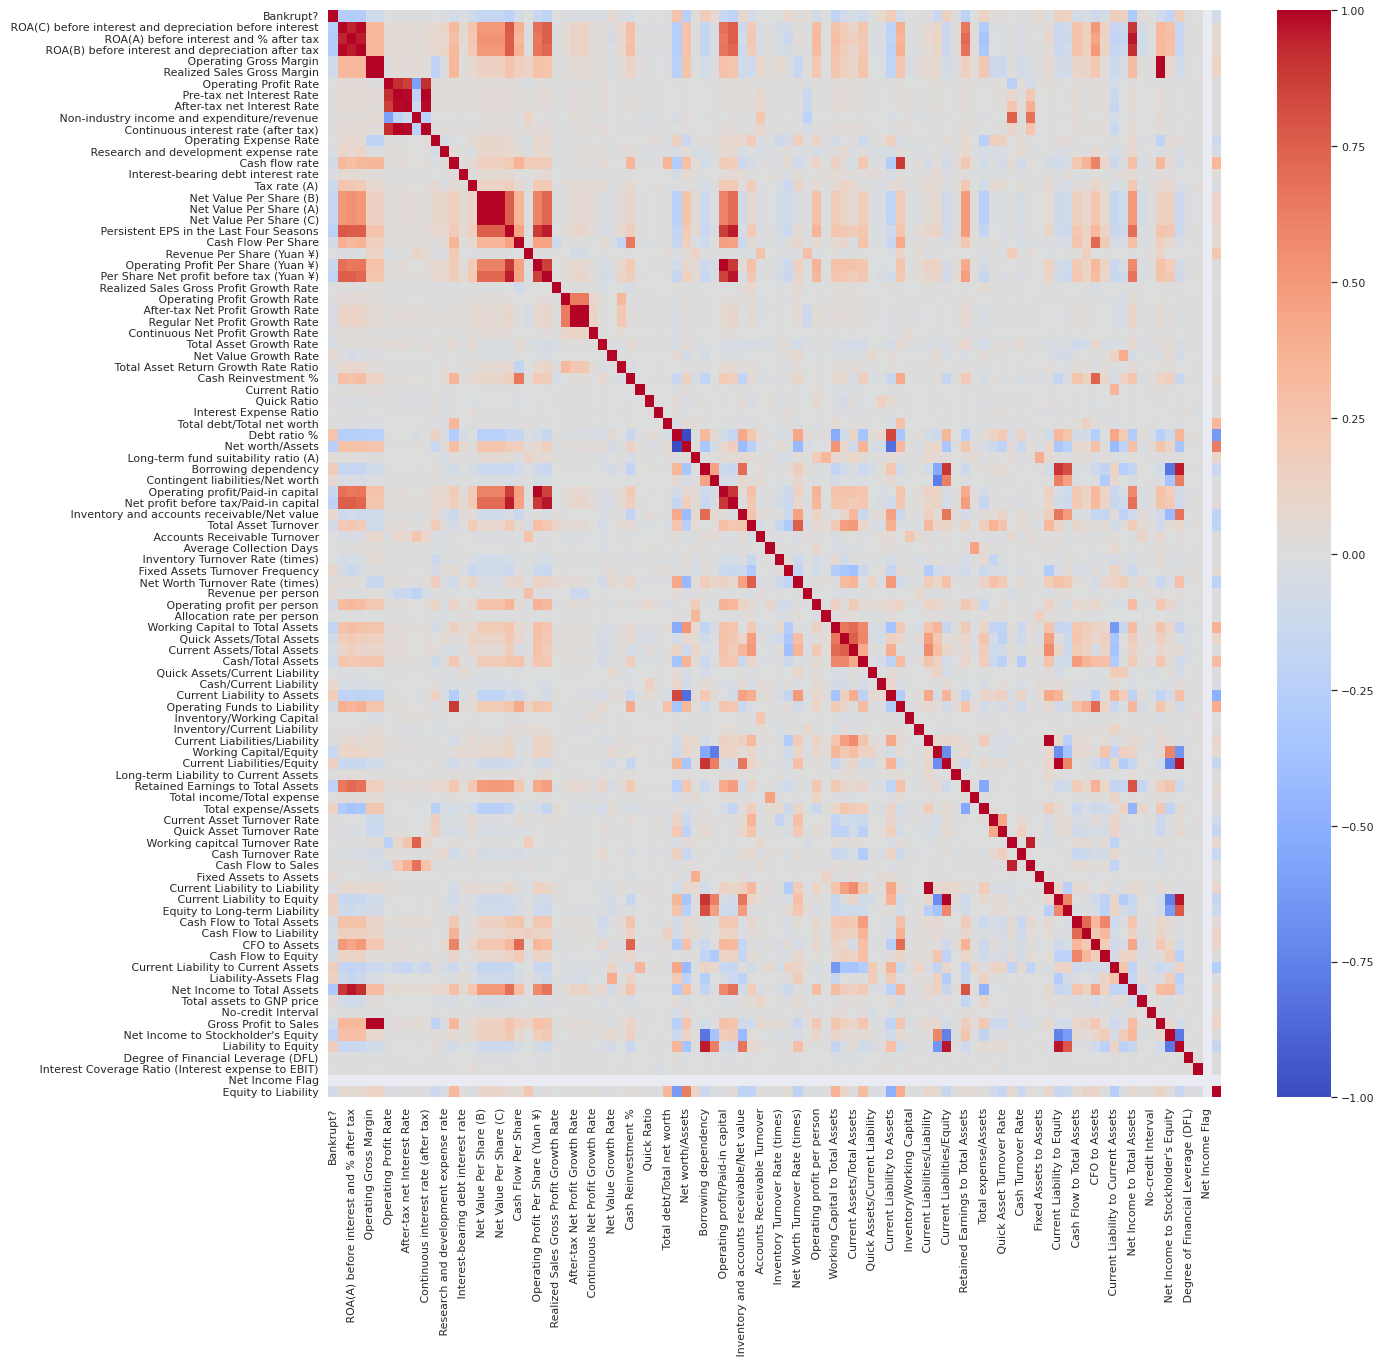

In [9]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [10]:
df.corrwith(df['Bankrupt?']).abs().sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
 Debt ratio %                                               0.250161
 Net worth/Assets                                           0.250161
 Persistent EPS in the Last Four Seasons                    0.219560
 Retained Earnings to Total Assets                          0.217779
 Net profit before tax/Paid-in capital                      0.207857
 Per Share Net profit before tax (Yuan ¥)                   0.201395
 Current Liability to Assets                                0.194494
 Working Capital to Total Assets                            0.193083
 Net Income to Stockholder's Equity                         0.180987
 Borrowing dependency             

In [11]:
df.drop(['Bankrupt?'], axis=1).corr().style.background_gradient(sns.light_palette('blue', as_cmap=True))

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.7/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [12]:
X0 = df.drop(['Bankrupt?'], axis=1)
Y0 = df['Bankrupt?']
vif = [variance_inflation_factor(X0.values, i) for i in range(X0.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X0.columns).T

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
vif,69.153828,43.861588,102.916564,6.148694e+07,1076.343196,2.078961e+08,4.537081e+07,1823.055735,1.975774e+07,338.143252,1.261342,1.092433,7.603267,1.042756,1.328246,782.245601,3912.266474,3126.160259,32.076389,4.241044,4.377368,638.108786,21.715022,1.039695,1.933153,133.512737,132.69105,1.023207,1.125587,1.332639,1.827569,3.746151,1.360369,1.059839,1.008979,1.572547,3.557585e+10,1.113716e+10,1.472,37.479681,9.884445,638.789636,30.101197,36.32528,6.025273,1.571902,1.307867,1.141163,1.344177,6.503902,3.34266,1.600822,1.151769,1.326426e+10,4.874005,2.374753e+11,3.133291,1.254245,1.066107,5.933143e+09,8.633711,1.090044,1.074195,1.990673e+10,43.029866,4.480496e+09,1.029584,3.80044,1.341967,3.402593,1.515856,1.440704,86.726177,1.151988,26.610558,1.216761,1.225403e+11,5.714564e+09,45.326084,4.686223,2.822455,7.492592,3.38588,3.119003,2.251696,29.348229,1.09193,1.016033,4.939921e+07,8.849961,470.354382,1.004914,1.006982,0.0,3.149513


In [13]:
df_cut = df.drop(df.columns[[2, 3, 5, 6,7,10, 16,18, 23, 27, 40, 41, 42,43, 64, 65, 66, 75, 78, 94]], axis=1)
df_cut.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.808809,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.169141,0.311664,0.017560,0.095921,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.424206,0.676269,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.809301,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.208944,0.318137,0.021144,0.093722,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.468828,0.308589,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.808388,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.180581,0.307102,0.005944,0.092338,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.

In [14]:
X = df_cut.drop(['Bankrupt?'], axis=1)
Y = df_cut['Bankrupt?']
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (A),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Current Liability to Liability,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
vif,8.673199,6.044257e+07,1.757601,4.387104,1.250069,1.0817,7.053503,1.03631,1.165561,3.215226,11.114438,4.049743,1.570751,5.567269,1.037534,1.865601,1.804719,1.02266,5.041827,1.321529,1.307706,3.430606,1.349948,1.054022,1.008316,1.515874,2.114654e+10,3.757164e+09,1.463726,3.362596,5.790887,1.437917,1.296786,1.137678,1.312366,5.678869,1.480881,1.580942,1.149868,8.269889e+09,4.239645,2.526473e+09,2.821317,1.184933,1.054947,5.926908e+09,8.352761,1.08196,1.065253,1.013887,3.688546,1.336842,2.984333,1.511063,1.434187,4.099703,1.144838,1.21558,8.248488,4.150477,4.180151,2.741291,7.083698,2.136894,3.028747,2.002574,10.714159,1.070869,1.012657,3.049341e+07,4.099697,8.198008,1.00389,1.006201,2.935909


In [15]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    Operating Gross Margin                                   6819 non-null   float64
 3    After-tax net Interest Rate                              6819 non-null   float64
 4    Non-industry income and expenditure/revenue              6819 non-null   float64
 5    Operating Expense Rate                                   6819 non-null   float64
 6    Research and development expense rate                    6819 non-null   float64
 7    Cash flow rate                                           6819 non-null   float64
 8    Interest-bearing 

# 4. 	**Modeling**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25)
LR = LogisticRegression()
LR.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [17]:
accuracy_score(y_test,LR.predict(X_test))

0.9571847507331378

In [18]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

# 4. Evaluation

In [19]:
accuracy_score(y_test, model_tree.predict(X_test))

0.9472140762463344

In [20]:
confusion_matrix(y_test.values, LR.predict(X_test))

array([[1632,   17],
       [  56,    0]])

In [21]:
confusion_matrix(y_test.values, model_tree.predict(X_test))

array([[1597,   52],
       [  38,   18]])

In [22]:
report = classification_report(y_test, LR.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1649
           1       0.00      0.00      0.00        56

    accuracy                           0.96      1705
   macro avg       0.48      0.49      0.49      1705
weighted avg       0.94      0.96      0.95      1705



In [23]:
report = classification_report(y_test, model_tree.predict(X_test), target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1649
           1       0.26      0.32      0.29        56

    accuracy                           0.95      1705
   macro avg       0.62      0.64      0.63      1705
weighted avg       0.95      0.95      0.95      1705



In [24]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(LR, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.9616269272230619


In [25]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model_tree, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   

0.9515564196749362


appendix 1

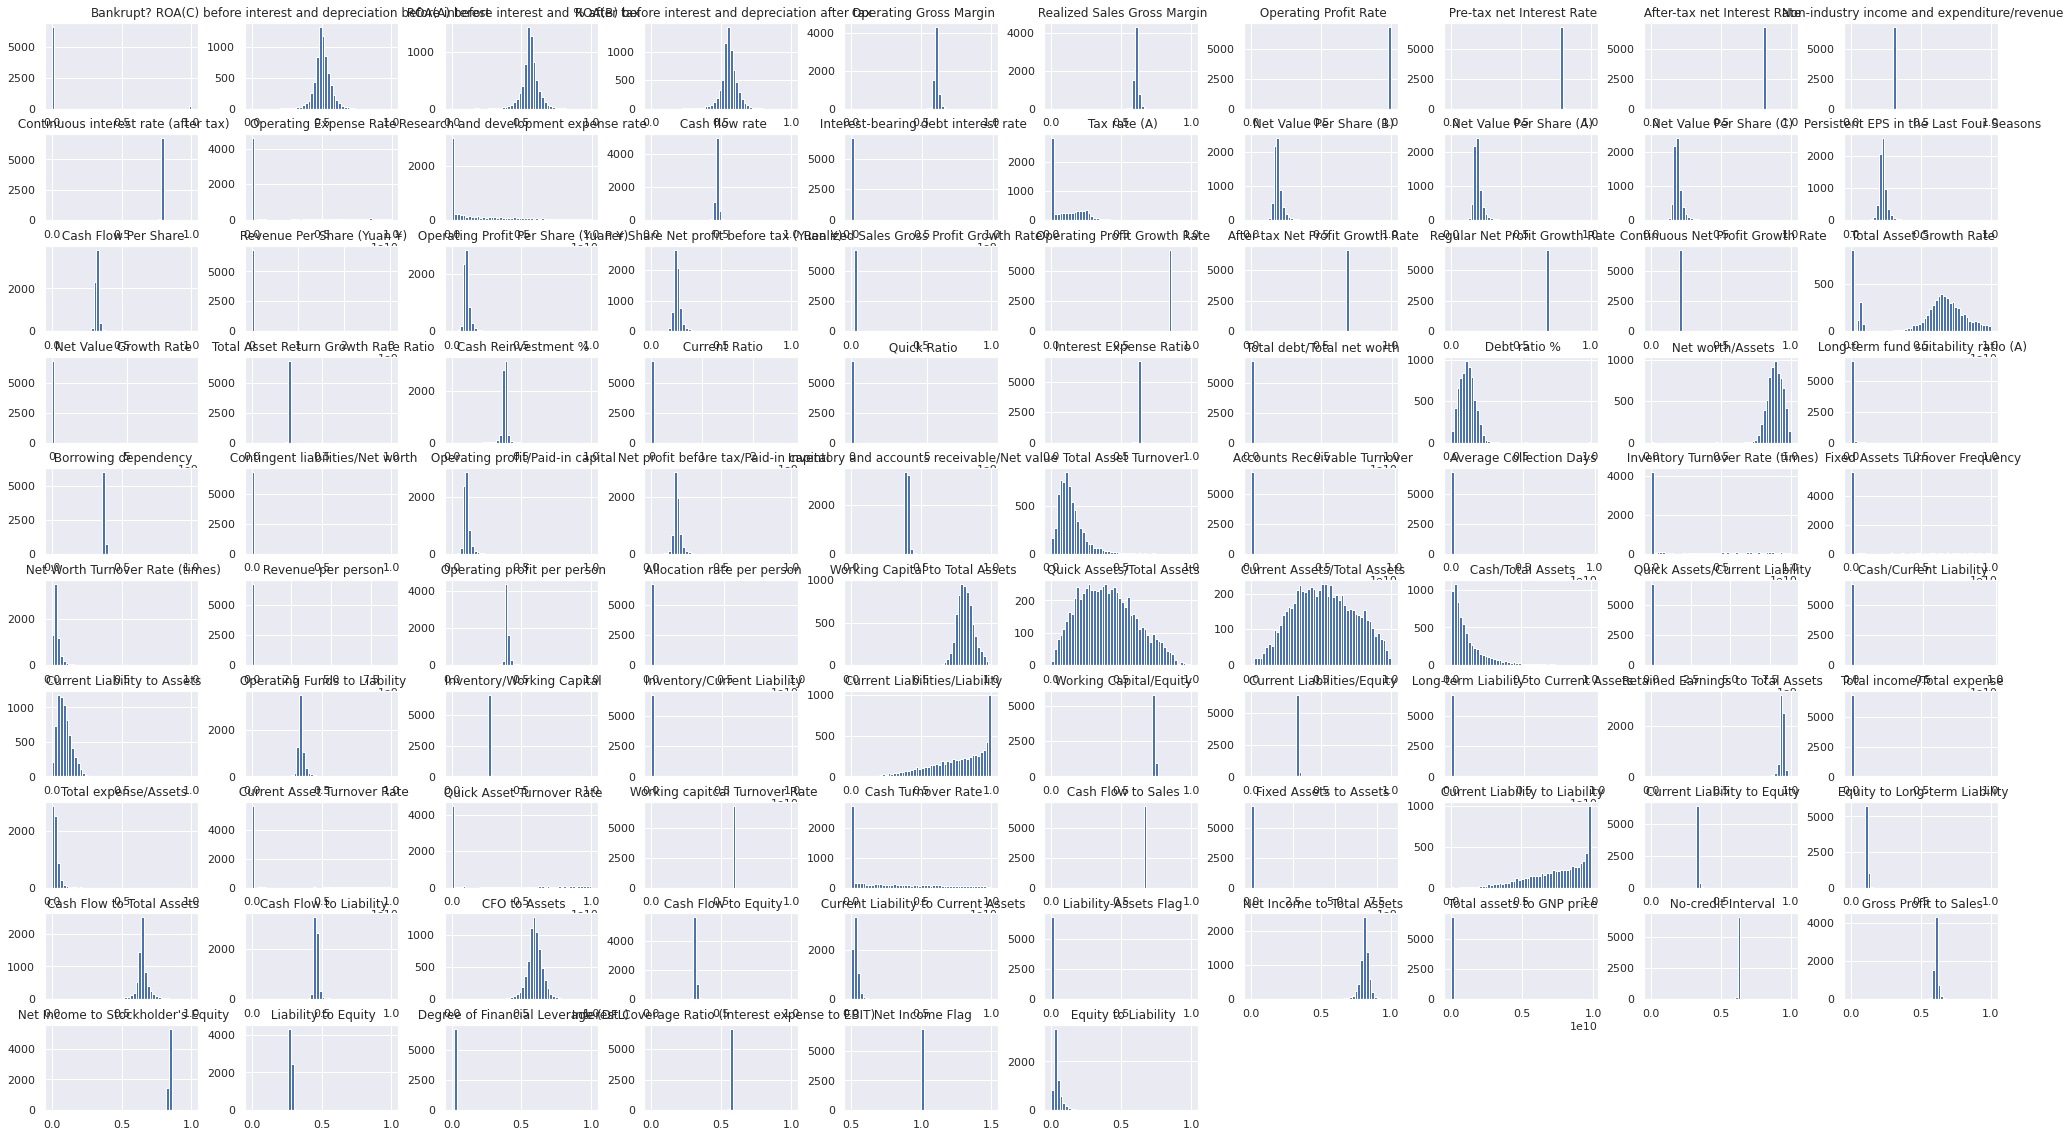

In [26]:
df.hist(bins = 50, figsize = (35,20))
plt.show()

appendix 2

In [27]:
a = (LR.coef_.tolist())
b = (X_train.columns)
coef_dict = {}
for coef, feat in zip(a[0],b):
    coef_dict[feat] = coef
coef_dict

{' ROA(C) before interest and depreciation before interest': -1.6998564918326984e-14,
 ' Operating Gross Margin': -1.773763146968112e-14,
 ' After-tax net Interest Rate': -2.293495801422913e-14,
 ' Non-industry income and expenditure/revenue': -8.702997235437557e-15,
 ' Operating Expense Rate': -1.5670132286966294e-10,
 ' Research and development expense rate': -2.781445229768016e-10,
 ' Cash flow rate': -1.3447573962879492e-14,
 ' Interest-bearing debt interest rate': -4.623038420304845e-09,
 ' Tax rate (A)': -4.984605074053646e-15,
 ' Net Value Per Share (A)': -6.357459991105671e-15,
 ' Persistent EPS in the Last Four Seasons': -7.774732162340517e-15,
 ' Cash Flow Per Share': -9.354766502125893e-15,
 ' Revenue Per Share (Yuan ¥)': -3.2043107847975055e-10,
 ' Operating Profit Per Share (Yuan ¥)': -3.811142177661995e-15,
 ' Realized Sales Gross Profit Growth Rate': -7.200714611224759e-16,
 ' Operating Profit Growth Rate': -2.4205875336354686e-14,
 ' After-tax Net Profit Growth Rate': -

In [28]:
df_try = df[df.columns[[0,11, 12,14, 30, 36, 46,47, 49, 51, 53, 59, 63, 67, 72, 76, 87]]]
df_try.tail(5)

,Bankrupt?,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Net Value Growth Rate,Total debt/Total net worth,Accounts Receivable Turnover,Average Collection Days,Fixed Assets Turnover Frequency,Revenue per person,Allocation rate per person,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Quick Asset Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
6814,0,1.510213e-04,4.500000e+09,1.790179e-04,0.000450,0.006655,0.000690,0.009177,0.000143,0.006348,0.006312,0.005072,0.013212,1.792237e-03,0.000124,0.400338,0.000466
6815,0,5.220000e+09,1.440000e+09,2.370237e-04,0.000445,0.004623,0.000655,0.009652,0.000605,0.016083,0.003401,0.004727,0.006730,2.204673e-03,0.000117,0.096136,0.001959
6816,0,2.509312e-04,1.039086e-04,0.000000e+00,0.000435,0.001392,0.001510,0.004188,0.001024,0.022097,0.002774,0.088212,0.007810,0.000000e+00,0.000175,0.055509,0.002840
6817,0,1.236154e-04,2.510000e+09,2.110211e-04,0.000529,0.003816,0.000716,0.008829,0.000233,0.012749,0.007489,0.007133,0.013334,3.200000e+09,0.000135,0.246805,0.002837
6818,0,1.431695e-03,0.000000e+00,5.900000e+08,0.000519,0.000461,0.000325,0.019474,0.000300,0.002097,0.000963,0.066674,0.000000,0.000000e+00,0.008238,0.005016,0.000707


In [29]:
X1 = df_try.drop(['Bankrupt?'], axis=1)
Y1 = df_try['Bankrupt?']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1,test_size=0.25)
LR1 = LogisticRegression()
LR1.fit(X1_train,y1_train)
accuracy_score(y1_test,LR1.predict(X1_test))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8140762463343109

appendix 3

In [30]:
accuracy_score(y_train,LR.predict(X_train))

0.9595228783730935

In [31]:
accuracy_score(y1_train,LR1.predict(X1_train))

0.8228392647633946